In [1]:
!pip install transformers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the dataset
# file_path = 'Reviews.csv'
df = pd.read_csv("C:/Vasu/Downloads/Master's/SEMESTER 3/NLP/NLP Final Project/Reviews.csv")




# Display the first few rows of the dataset and its structure
print(df.head())
print(df.info())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasuh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasuh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vasuh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   Unnamed: 0                       Review-Title              rating  \
0           0                   Worst phone ever  1.0 out of 5 stars   
1           1          Ok !!! Not up to the mark  2.0 out of 5 stars   
2           2                       Awesome look  5.0 out of 5 stars   
3           3  One plus losing is originality!!!  3.0 out of 5 stars   
4           4                               Read  1.0 out of 5 stars   

                                         Review-Body  \
0                                       Hang problem   
1  I'm writing this review after using 3days !!!B...   
2  Camera is so good n very fast phone back look ...   
3  The media could not be loaded.\n              ...   
4  I got my delivery on 23 feb when I unboxed the...   

                                        Product Name  
0  OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...  
1  OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...  
2  OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...  
3  OnePlus

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Handle missing Review-Body entries before applying the preprocessing
df['Review-Body'] = df['Review-Body'].fillna('')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['cleaned_body'] = df['Review-Body'].apply(preprocess_text)

# Convert ratings to numerical values and standardize sentiment
rating_mapping = {'5.0 out of 5 stars': 'Positive', '4.0 out of 5 stars': 'Positive', 
                  '3.0 out of 5 stars': 'Neutral', '2.0 out of 5 stars': 'Negative', 
                  '1.0 out of 5 stars': 'Negative'}
df['Sentiment'] = df['rating'].map(rating_mapping)

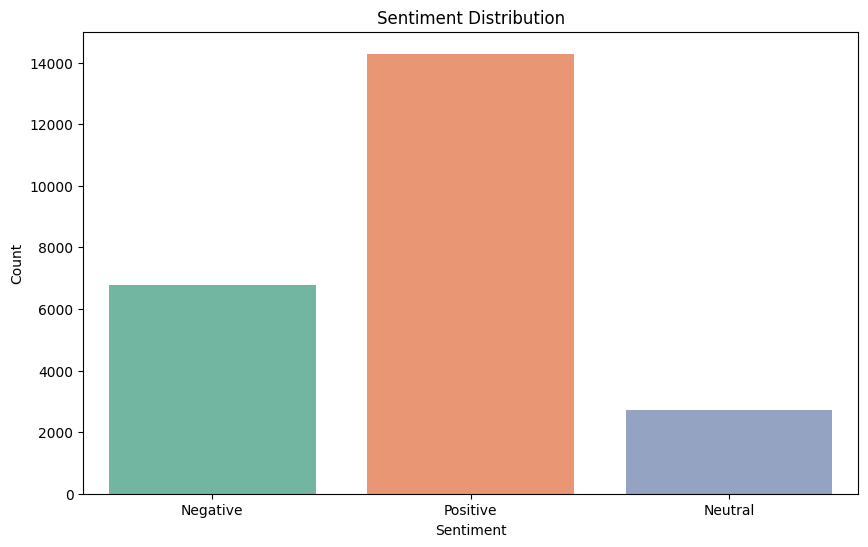

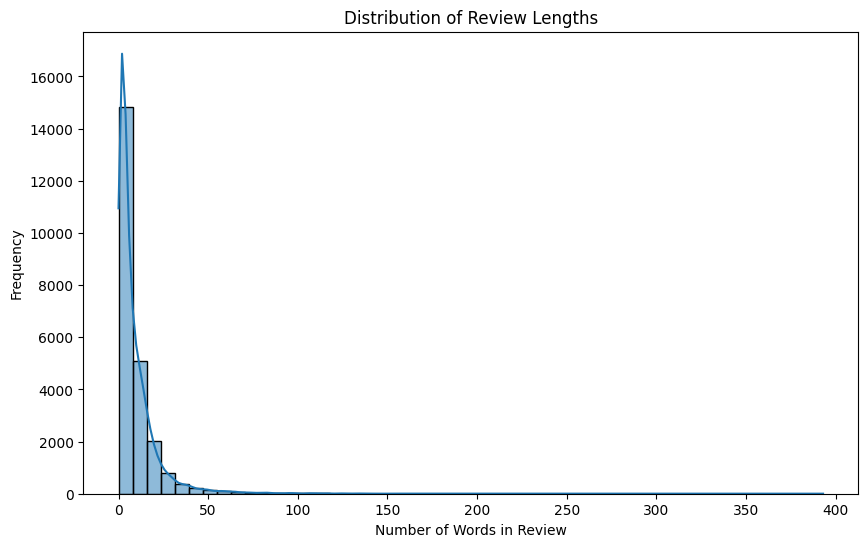

In [4]:
# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='Set2', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualize review lengths
review_lengths = df['cleaned_body'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(review_lengths, bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Feature extraction
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_body'])
y = df['Sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

    Negative       0.74      0.70      0.72      1328
     Neutral       0.31      0.11      0.17       566
    Positive       0.80      0.92      0.86      2862

    accuracy                           0.76      4756
   macro avg       0.62      0.58      0.58      4756
weighted avg       0.73      0.76      0.74      4756



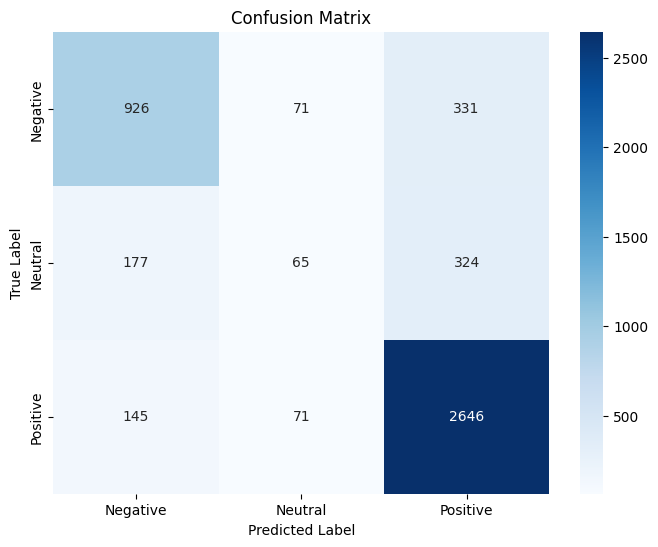

In [6]:
# Predict on test data
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

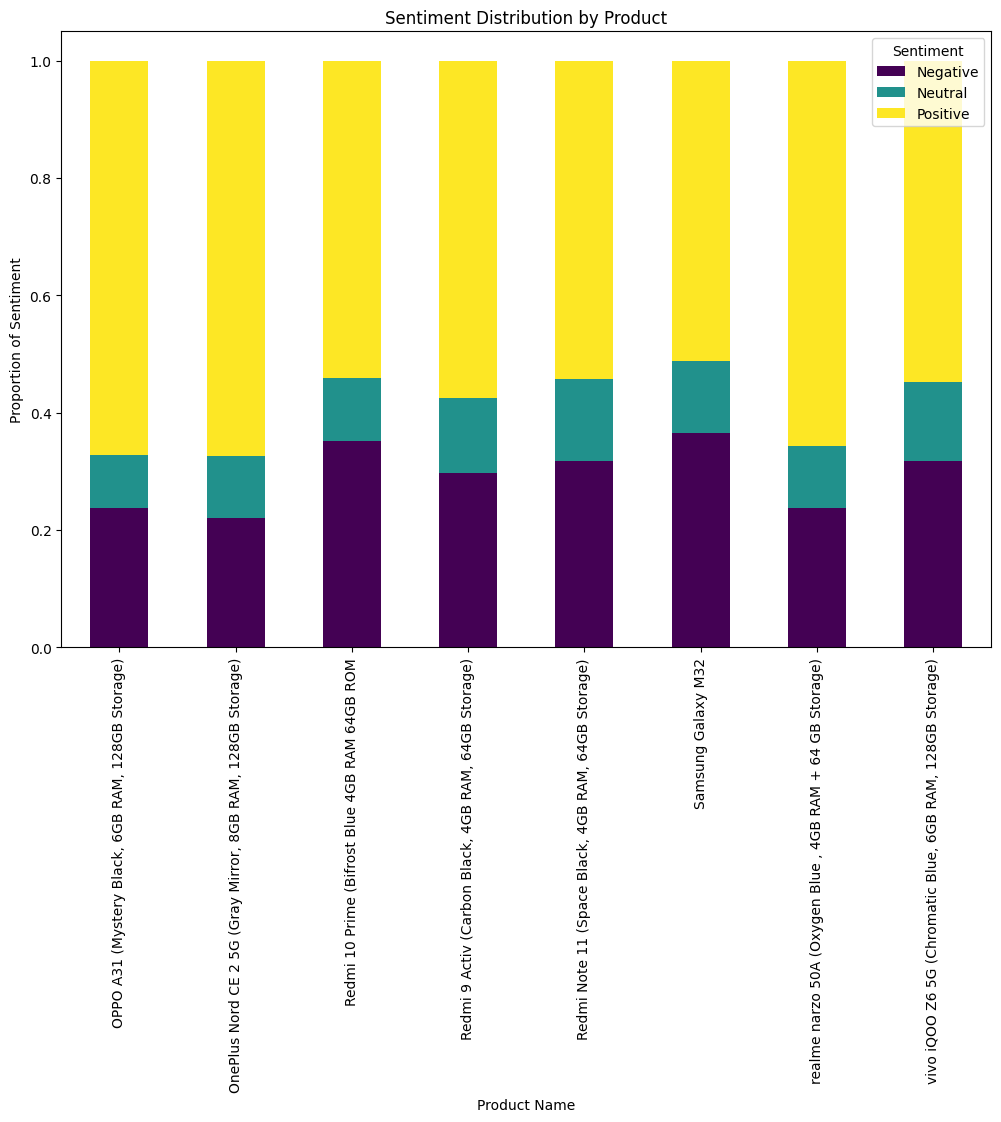

In [7]:
# Group data by Product Name and calculate sentiment distribution
product_sentiment = df.groupby('Product Name')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Plot sentiment trends for different products
product_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product Name')
plt.ylabel('Proportion of Sentiment')
plt.legend(title='Sentiment')
plt.show()

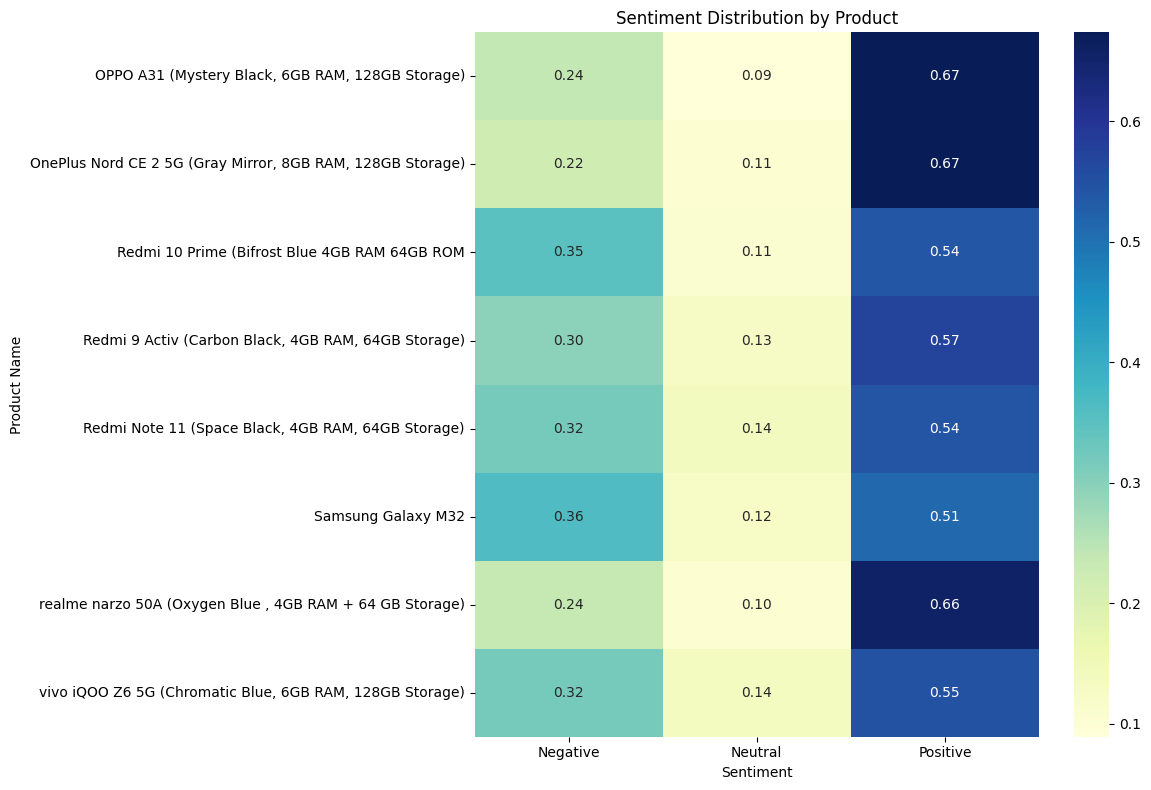

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming product_sentiment is already created as in your original code
plt.figure(figsize=(12, 8))
sns.heatmap(product_sentiment, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Sentiment Distribution by Product')
plt.xlabel('Sentiment')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

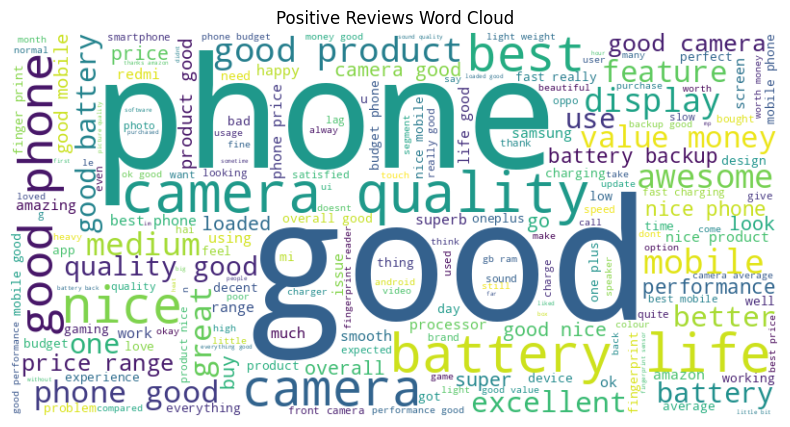

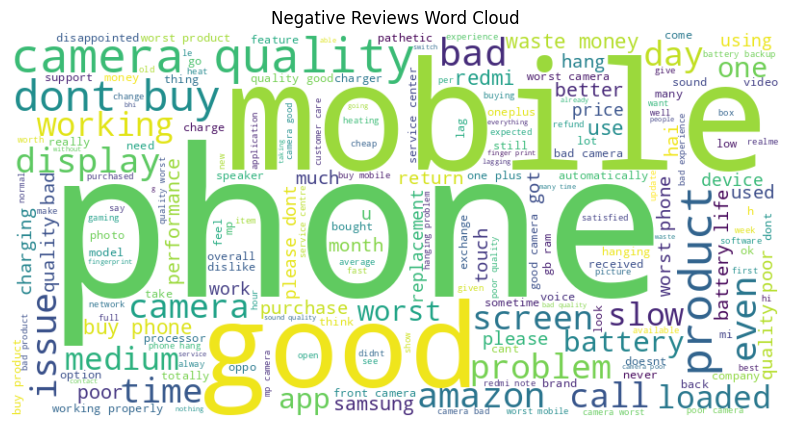

In [9]:
!pip install wordcloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and plot word clouds for positive and negative reviews
positive_reviews = df[df['Sentiment'] == 'Positive']['cleaned_body'].str.cat(sep=' ')
negative_reviews = df[df['Sentiment'] == 'Negative']['cleaned_body'].str.cat(sep=' ')

plot_wordcloud(positive_reviews, 'Positive Reviews Word Cloud')
plot_wordcloud(negative_reviews, 'Negative Reviews Word Cloud')

In [10]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

def extract_aspects(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    aspects = [word for word, pos in pos_tags if pos.startswith('NN')]
    return aspects

# Example usage
sample_review = "The battery life is great but the camera is poor."
aspects = extract_aspects(sample_review)
print("Extracted Aspects:", aspects)

Extracted Aspects: ['battery', 'life', 'camera']


In [11]:
!pip install tensorflow

In [12]:
!pip install torch

In [13]:
!pip install tf-keras

In [14]:
!pip install --upgrade tensorflow torch

In [15]:
from transformers import pipeline

emotion_classifier = pipeline('text-classification', model='bhadresh-savani/distilbert-base-uncased-emotion')

# Analyze emotions in a review
sample_text = "I am thrilled with the new features!"
emotions = emotion_classifier(sample_text)
print("Detected Emotions:", emotions)


Detected Emotions: [{'label': 'joy', 'score': 0.9987305998802185}]


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

texts = ["I want to buy this product", "Can you help me with my order?", "This service is terrible"]
labels = ['purchase', 'inquiry', 'complaint']

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

classifier = SVC(kernel='linear')
classifier.fit(X, labels)

new_text = ["I need assistance with my account"]
new_X = vectorizer.transform(new_text)
predicted_intent = classifier.predict(new_X)
print("Predicted Intent:", predicted_intent)

Predicted Intent: ['inquiry']


In [17]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install --upgrade pip setuptools

Note: you may need to restart the kernel to use updated packages.


In [19]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

def analyze_sentiment_bert(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    probs = F.softmax(logits, dim=1)
    sentiment = torch.argmax(probs).item()
    return "Positive" if sentiment == 1 else "Negative"

# Example usage
sample_text = "I love this product!"
bert_sentiment = analyze_sentiment_bert(sample_text)
print(f"BERT Sentiment: {bert_sentiment}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Sentiment: Negative
